In [114]:
import pandas as pd

In [115]:
import os
os.chdir("C:\\Users\\Excalibur\\Desktop\\VERİ BİLİMİ\\_____VERİ_SETLERİ_____")

In [116]:
df = pd.read_csv("IRIS.csv")

In [117]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [118]:
df.describe() #Veri hakkında istatiksel bilgi elde etmek için kullanılır.

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Yukarıdaki tabloda görüldüğü üzere veri setindeki sayısal değişkenlerin ortalama(mean) ve meydan(%50) değerlerin birbirlerine yakın ve normal dağıldıkları söylenebilir.

In [119]:
df.info() #info fonksiyonu her özellik (feature) için null olmayan satır bilgisini ve özellik türünü belirtir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [120]:
df.shape

(150, 5)

In [121]:
import seaborn as sns

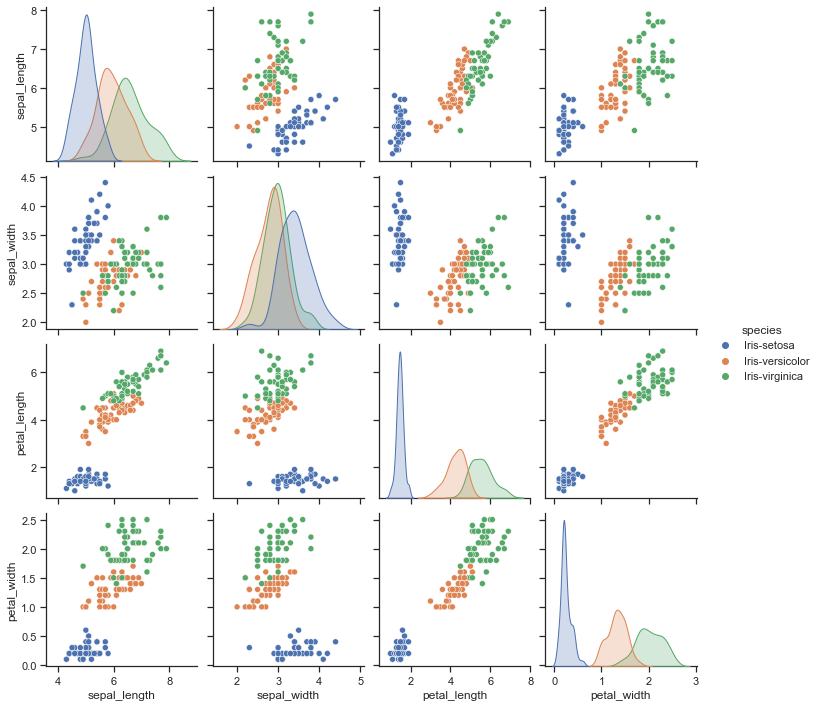

In [122]:
sns.set(style = "ticks")
sns.pairplot(df, hue="species");

## Makine Öğrenme Modeli Oluşturma

Modelimizi Denetimli Öğrenme (Supervised Learning) metoduyla eğiteceğiz. Veri setimizde iris-setosa, iris-versicolor ve iris-virginica olmak üzere üç etiketimiz var. Bu yüzden Denetimli Öğrenme metodunu kullanacağız.

Denetimli Öğrenme metodunu uygulamak için de problemimizin bir Sınıflandırma (Classification) problemi mi, yoksa Regresyon (Regression) problemi mi olduğuna karar vermemiz gerek. Bizim problemimiz bir Sınıflandırma problemi, çünkü veri setimiz üç ayrı sınıfa ayrılmış durumda: iris-setosa, iris-versicolor ve iris-virginica.

**Hangi makine öğrenme algoritmasını kullanmalıyız?**

Bu noktada kesin bir şey söylemek yanlış olabilir. En yüksek başarı oranına sahip modeli elde edebilmek için modeli birkaç farklı algoritmayla eğitip modelleri karşılaştırarak hangi algoritmanın daha iyi sonuç verdiğine bakacağız. Ardından, en iyi sonucu sağlayan algoritmaya odaklanacağız.

**Lojistik Regresyon (Logistic Regression)**
 
Başlık nedeniyle “Sınıflandırma problemi çözmüyor muyduk, neden regresyon algoritması kullanıyoruz?” diyebilirsiniz, ama lojistik regresyon algoritması sınıflandırma problemlerinde kullanılan bir algoritmadır.

 
**İkili Lojistik Regresyon (Binary Logistic Regression)**
 
Bu algoritma 0 ve 1 çıktılarıyla ikili sınıflandırma sağlar. Örneğin, bir e-postayı spam veya spam değil olarak veya bir denklemi doğru veya yanlış olarak sınıflandırır.

 
Regresyon olmasının nedeni her zaman 0 ve 1 gibi belirli çıktılar vermemesidir.

 
**Çok Değişkenli Lojistik Regresyon (Multinomial Logistic Regression)**
 
Üç veya daha fazla kategoriye sahip verileri sınıflandırmak için kullanılan bir Logistic Regression yöntemidir.

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [124]:
X = df.drop("species",axis=1) # sayısal veriler
y = df.species # etiket

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#Veriyi 0,8 oranında eğitim ve 0,2 oranında test verisi olarak böldük

In [125]:
base_iris_logistic = LogisticRegression()
base_iris_logistic.fit(X_train, y_train)

C:\Users\Excalibur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [126]:
base_model_predicts = base_iris_logistic.predict(X_test)

print("Temel model eğitim verilerinden doğruluk: {0}".format(base_iris_logistic.score(X_train,y_train)))
print("Temel model test verilerinden doğruluk: {0}".format(base_iris_logistic.score(X_test,y_test)))

Temel model eğitim verilerinden doğruluk: 0.9666666666666667
Temel model test verilerinden doğruluk: 0.9333333333333333


In [127]:
custom_iris_logistic = LogisticRegression(multi_class= "multinomial", solver = "newton-cg")
custom_iris_logistic.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [128]:
custom_model_predicts = custom_iris_logistic.predict(X_test)

print("Temel model eğitim verilerinden doğruluk: {0}".format(custom_iris_logistic.score(X_train,y_train)))
print("Temel model test verilerinden doğruluk: {0}".format(custom_iris_logistic.score(X_train,y_train)))

Temel model eğitim verilerinden doğruluk: 0.9666666666666667
Temel model test verilerinden doğruluk: 0.9666666666666667


In [129]:
# Modelin yüzde cinsinden bilirlik oranını hesaplıyoruz.
base_model_accuracy = base_iris_logistic.score(X_test, y_test)*100
custom_model_accuracy = custom_iris_logistic.score(X_test, y_test)*100

Modelimizin bilirlik oranını elde ettiğimize göre artık bu oranları bir grafikte karşılaştırabiliriz. 

In [130]:
import matplotlib.pyplot as plt

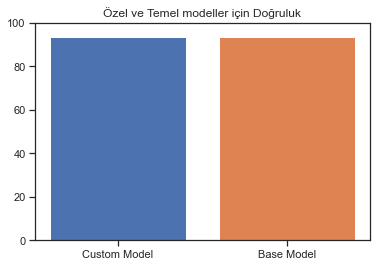

In [131]:
plt.bar("Custom Model", custom_model_accuracy)
plt.bar("Base Model", base_model_accuracy)

plt.yticks([0,20,40,60,80,100])
plt.title("Özel ve Temel modeller için Doğruluk")
plt.show()

Modelimizi varsayılan lineer regresyon algoritmasıyla ve varsayılan ve özel parametrelerle eğittik. Test verileri için hangisinin daha iyi sonuç verdiğini gördük. Bu sefer ikiside aynı sonuçları verdi, ama bilirlik oranı eğitim verileri ve test verilerine göre değişiklik gösterebilir.

### K-En Yakın Komşu Algoritması (K-Nearest Neighbor Algorithm (KNN))

In [132]:
from sklearn.neighbors import KNeighborsClassifier

In [133]:
iris_knn = KNeighborsClassifier(n_neighbors=3)

In [134]:
iris_knn.fit(X_train, y_train) #Modelimizi eğitim verilerine göre eğittik.

KNeighborsClassifier(n_neighbors=3)

KNN algoritmasında komşu sayısı modelimizin bilirlik oranı için önemlidir. Eğer komşu sayısı yeterli değilse modelimizin fazla güvenilir olmaz. Eğer komşu sayısı çok fazlaysa, model overfitting yaşar ve benzer şekilde, bu da modelin güvenilirliğini azaltır. Ayrıca overfitting zaman komplikasyonlarına yol açar, yani modelin tepki verme süresini uzatır. Bu sefer lojistik regresyon algoritmasında yaptığım gibi modeli aynı algoritmayla iki kez eğitmeyeceğim, ama daha iyi bir bilirlik oranı elde etmek için komşu sayısı değiştirilebilir.

In [135]:
knn_test_values = iris_knn.predict(X_test)
# Tahmin edilen KNN değerleri için değişkenlerden yararlanıyoruz.
# Bu değerleri test verilerimizin etiketleriyle, yani gerçek 
# sonuçlarla, karşılaştıracağız ve başarı oranımızı göreceğiz.

In [136]:
true_predicts = 0
import numpy as np

In [137]:
testy = np.array(y_test)

for i in range(len(y_test)):
    if (testy[i] == knn_test_values[i]):
        true_predicts += 1
        
print("Test Değişkenleri Boyutu:",len(testy))
# Şimdi, başarı oranını yüzde cinsinden hesaplayalım.
# Toplam test verisi sayısı 30
knn_accuracy = 100*true_predicts/len(testy)
print("irisdataset için KNN Doğruluğu: %", knn_accuracy)

Test Değişkenleri Boyutu: 30
irisdataset için KNN Doğruluğu: % 93.33333333333333


Şimdi elimizde hem lojistik regresyonun hem de KNN’nin bilirlik oranı var. Üçünü de yan yana görmek için bir tane daha grafik oluşturalım.

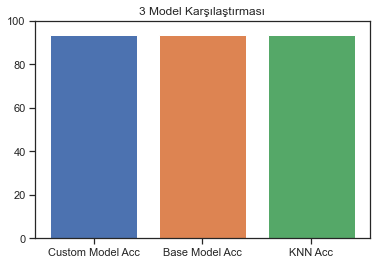

In [138]:
plt.bar("Custom Model Acc",custom_model_accuracy)
plt.bar("Base Model Acc",base_model_accuracy)
plt.bar("KNN Acc",knn_accuracy)
plt.yticks([0,20,40,60,80,100]) #y ekseninde görmek istediğimiz rakamlar
plt.title("3 Model Karşılaştırması")

plt.show()

### Naive Bayes Sınıflandırma (Naive Bayes Classifier)
 
Naive Bayes sınıflandırma algoritması olabilecek her durum için olasılıkları hesaplar ve çıktı olarak en yüksek olasılığa sahip olan sınıfı seçer. 

Üç farklı şekilde incelenebilir.

1. Gaussian: Bu genel bir sınıflandırmadır ve özelliklerin normal bir dağılım izlediğini varsayar.
2. Multinomial: Ayrık sayılar için kullanılır.
3. Bernoulli: İkili problemler için kullanılır, 0 ve 1 gibi veya bir e-postanın spam olup spam olmaması gibi.

 
Biz bu Iris veri seti için Gaussian modelini kullanacağız.

In [139]:
from sklearn.naive_bayes import GaussianNB

In [140]:
iris_gaussian = GaussianNB()  #Modelimizi oluşturduk
iris_gaussian.fit(X_train, y_train) #Modelimizi eğitiyoruz.

GaussianNB()

In [141]:
gaussian_predicts = iris_gaussian.predict(X_test)
#Tahminimizi gaussian_predicts adlı değişkende tutuyoruz.

In [142]:
true_predict = 0

for i in range(len(testy)):
    if (testy[i] == gaussian_predicts[i]):
        true_predict += 1
        
print('GaussianNB doğru tahmin sayısı: ',true_predict)
print('İris veri kümesi için GaussianNB Accuracy uygulamamız: %',true_predict*100/len(testy))

GaussianNB doğru tahmin sayısı:  28
İris veri kümesi için GaussianNB Accuracy uygulamamız: % 93.33333333333333


In [143]:
# veya sklearn'in bize sağladığı başka bir seçenek
from sklearn.metrics import accuracy_score
gaussian_accuracy = accuracy_score(testy, gaussian_predicts)
print("Sklearns doğruluk işlevi GaussianNB İris veri kümesi için Doğruluk: %", gaussian_accuracy*100)
gaussian_accuracy = gaussian_accuracy*100

Sklearns doğruluk işlevi GaussianNB İris veri kümesi için Doğruluk: % 93.33333333333333


Şimdi elimizde bir başka model ve onun bilirlik oranı var. Bu modeli de modelleri karşılaştırdığımız grafiğe ekleyebiliriz.

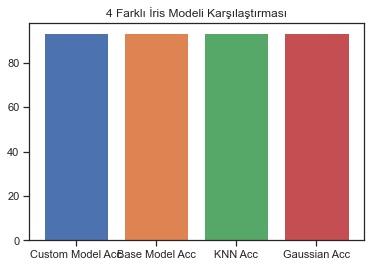

In [144]:
plt.bar('Custom Model Acc',custom_model_accuracy)
plt.bar('Base Model Acc',base_model_accuracy)
plt.bar('KNN Acc',knn_accuracy)
plt.bar('Gaussian Acc',gaussian_accuracy)
plt.title('4 Farklı İris Modeli Karşılaştırması')
plt.show()

### Destek Vektör Makineleri (Support Vector Machine (SVM))

SVM sınıfları (özellikleri) bir hiper düzlemle bölen makine öğrenmesi algoritmasıdır.
Örnek: Eğer uzayımız iki boyutluysa (özellikli) iki sınıfımız vardır. Bu durumda hiper düzlem iki sınıfı birbirinden ayıran bir çizgi olacaktır.

In [145]:
from sklearn import svm

In [146]:
iris_svm = svm.SVC()

In [147]:
iris_svm.fit(X_train, y_train)

SVC()

Şimdi SVM algoritmasıyla özelleştirilmiş bir model yaratmak için kullanabileceğimiz bazı parametrelerden bahsetmek istiyorum. Kernel parametresiyle hiper düzlemimizin lineer, polinomiyal, vb. olup olmayacağına karar verebiliriz; yani hiper düzlemimizin yapısını belirleyebiliriz.

In [148]:
svm_predict = iris_svm.predict(X_test)

svm_accuracy = accuracy_score(testy, svm_predict)
svm_accuracy = svm_accuracy*100

print("iris veri kümesi için SVM Doğruluğu: %",svm_accuracy)

iris veri kümesi için SVM Doğruluğu: % 96.66666666666667


 Tekrardan modellerimizi bir grafik üzerinde görelim.

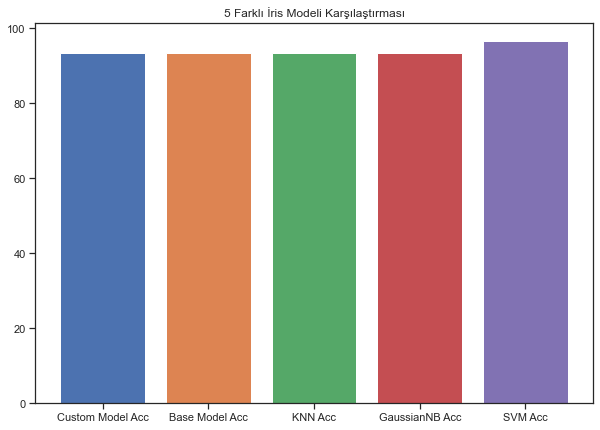

In [149]:
plt.figure(figsize =(10,7))
plt.bar('Custom Model Acc',custom_model_accuracy)
plt.bar('Base Model Acc',base_model_accuracy)
plt.bar('KNN Acc',knn_accuracy)
plt.bar('GaussianNB Acc',gaussian_accuracy)
plt.bar('SVM Acc',svm_accuracy)
plt.title("5 Farklı İris Modeli Karşılaştırması")

plt.show()

### Karar Ağacı (Decision Tree Classifier)

Karar Ağacı veri elemanlarını gruplara böler. Bu grupların etiketleri aynı olmalıdır, bu yüzden karar ağacı her grup aynı etiketi taşıyana kadar bir düğümü defalarca alt düğümlere böler.

 
Amaç veri özelliklerinden elde edilen basit karar verme kurallarını öğrenip hedef değişkenin değerini tahmin etmektir.

In [150]:
from sklearn.tree import DecisionTreeClassifier
iris_decisiontree = DecisionTreeClassifier(criterion="entropy")
iris_decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [151]:
predictions_tree = iris_decisiontree.predict(X_train)
trainy = np.array(y_train)
predictions_tree = accuracy_score(trainy, predictions_tree)*100
print('Eğitim verileri için iris veri kümesi için Karar Ağacı Doğruluğu: %', predictions_tree)

predictions_tree = iris_decisiontree.predict(X_test)
predictions_tree = accuracy_score(testy,predictions_tree)*100
print('Test verileri için iris veri kümesi için Karar Ağacı Doğruluğu: %', predictions_tree)


Eğitim verileri için iris veri kümesi için Karar Ağacı Doğruluğu: % 100.0
Test verileri için iris veri kümesi için Karar Ağacı Doğruluğu: % 90.0


### Rastgele Orman (Random Forest Classifier)

Rastgele Orman daha başarılı ve daha stabilize bir model yaratmak amacıyla Karar Ağaçlarını birleştirerek rastgele bir orman yaratır.

In [152]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
iris_randomforest = RandomForestClassifier(n_estimators = 100)
#n _estimators parametresiyle ormanda bulunmasını istediğimiz karar ağacı sayısını belirliyoruz.

In [154]:
iris_randomforest.fit(X_train, y_train)

RandomForestClassifier()

In [155]:
randomforest_accuracy = iris_randomforest.score(X_test, y_test)*100
print('Test verilerinde iris veri kümesi için Rastgele Orman Doğruluğu: %',randomforest_accuracy)
print('Eğitim verilerinde iris veri kümesi için Rastgele Orman Doğruluğu: %',iris_randomforest.score(X_train,y_train)*100)

Test verilerinde iris veri kümesi için Rastgele Orman Doğruluğu: % 93.33333333333333
Eğitim verilerinde iris veri kümesi için Rastgele Orman Doğruluğu: % 100.0


#### Artık tüm modellerimizi aynı grafik üzerinde inceleyebilir ve hangisinin en yüksek bilirlik oranına sahip olduğunu görebiliriz.

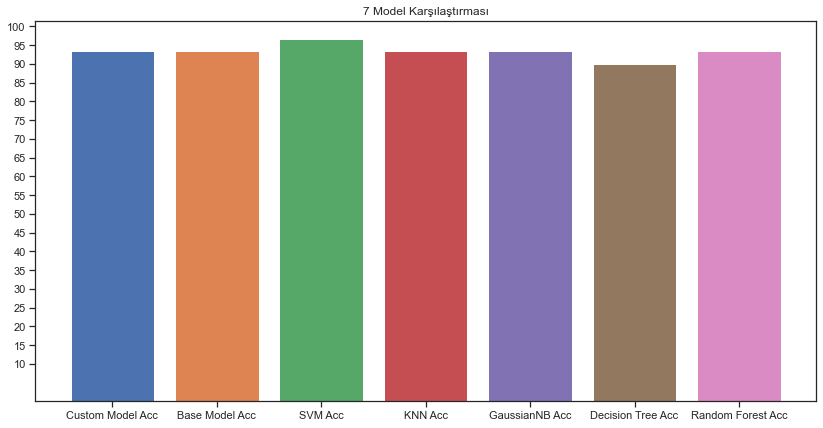

In [156]:
plt.figure(figsize =(14,7))
plt.bar('Custom Model Acc',custom_model_accuracy)
plt.bar('Base Model Acc',base_model_accuracy)
plt.bar('SVM Acc',svm_accuracy)
plt.bar('KNN Acc',knn_accuracy)
plt.bar('GaussianNB Acc',gaussian_accuracy)
plt.bar('Decision Tree Acc',predictions_tree)
plt.bar('Random Forest Acc',randomforest_accuracy)
plt.yticks([i for i in range(10,105,5)])
plt.title("7 Model Karşılaştırması")

plt.show()

SVM modelimizin bilirlik oranı daha yüksek çıktı ve biz SVM modelimizin üzerinde duracağız. Veri setini özelleştirip SVM algoritmasını kullanarak yeni bir model oluşturacağız. Ardından yeni modelimizi özelleştirdiğimiz veri setiyle eğiteceğiz.

In [157]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


SepalLenghtCm ve SepalWidthCm’yi çarpıp Sepal sütununu oluşturacağız. Sonra PetalLenghtCm ve PetalWidthCm’yi çarpıp Petal sütununu oluşturacağız. Ardından modelimizi tekrardan eğiteceğiz

In [158]:
sepal = df.sepal_length * df.sepal_width
petal = df.petal_length * df.petal_width

df_new = pd.DataFrame({"Sepal":sepal,
                       "Petal":petal,
                       "Species":df.species})

In [159]:
df_new.head()

,Sepal,Petal,Species
0,17.85,0.28,Iris-setosa
1,14.70,0.28,Iris-setosa
2,15.04,0.26,Iris-setosa
3,14.26,0.30,Iris-setosa
4,18.00,0.28,Iris-setosa


In [160]:
xtrain,xtest,ytrain,ytest = train_test_split(df_new.drop("Species", axis=1), df_new.Species, test_size = 0.1)

In [161]:
newmodel = svm.SVC()
newmodel.fit(xtrain, ytrain)

SVC()

In [162]:
predicts = newmodel.predict(xtest)
print('Test setleri için serbest stil yeni modellerimizin doğruluğu: %',accuracy_score(newmodel.predict(xtest),ytest)*100)

Test setleri için serbest stil yeni modellerimizin doğruluğu: % 100.0


Şimdi elimizde özelleştirdiğimiz modelimizin bilirlik oranı var. Hem modelimizin cevaplarını hem de doğru cevapları gösteren bir grafik oluşturacağız. Bu grafikte çizgilerin üzerinde olmayan noktalar (tahminler) yanlış cevapları gösteriyor.

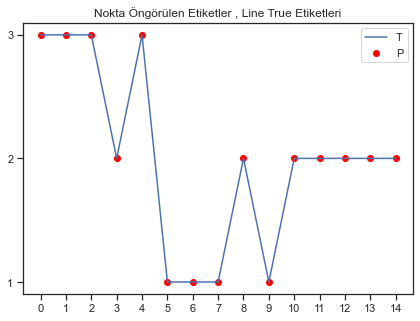

In [163]:
predict = []
ytest = np.array(ytest)
numeric = []

for i in ytest:
    if i == "Iris-setosa":
        numeric.append(1)
    elif i == "Iris-versicolor":
        numeric.append(2)
    elif i == "Iris-virginica":
        numeric.append(3)

xnumbers = [i for i in range(len(ytest))]

for i in predicts:
    if i == 'Iris-setosa':
        predict.append(1)
    elif i=='Iris-versicolor':
        predict.append(2)
    elif i=='Iris-virginica':
        predict.append(3)
        
plt.figure(figsize=(7,5))
plt.title("Nokta Öngörülen Etiketler , Line True Etiketleri")
plt.plot(numeric)
plt.scatter(xnumbers,predict,color = 'red')
plt.xticks([i for i in range(len(xnumbers))])
plt.yticks([1,2,3])
plt.legend("TP")

plt.show()

Gördüğünüz gibi tüm kırmızı noktalar çizginin üzerinde, yani hiç yanlış tahmin yok. Modelimizin verdiği tüm cevaplar doğru.

**SONUÇ :** Sınıflandırma metoduyla 6 farklı makine öğrenme modeli oluşturduk. Iris veri setinde çok fazla veri yok ve pek karmaşık değil, bu da bizim çok detaylı bir model oluşturmadan da iyi sonuçlar elde etmemizi sağladı. Iris veri setinde en verimli modelin SVM modeli olduğunu gördük. Sonrasında özelleştirilmiş bir modelin verimliliğini görmek için yeni özelliklerle yeni bir model yarattık.